<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Data Visualization with Python: Final Assignment</font></h1>

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [4]:
df_sur = pd.read_csv('https://cocl.us/datascience_survey_data', index_col = 0)
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [5]:
df_sur.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [6]:
df_sur.shape

(6, 3)

In [7]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


In [8]:
df_sur.sort_values(['Very interested'], ascending=True, axis=0, inplace=True)

In [9]:
df_sur = ((df_sur / 2233) * 100).round(2)

In [10]:
df_sur.head()

,Very interested,Somewhat interested,Not interested
Data Journalism,19.21,48.41,27.32
Deep Learning,56.56,34.48,6.09
Big Data (Spark / Hadoop),59.65,32.65,5.69
Data Visualization,60.01,32.87,4.57
Machine Learning,72.95,21.36,3.31


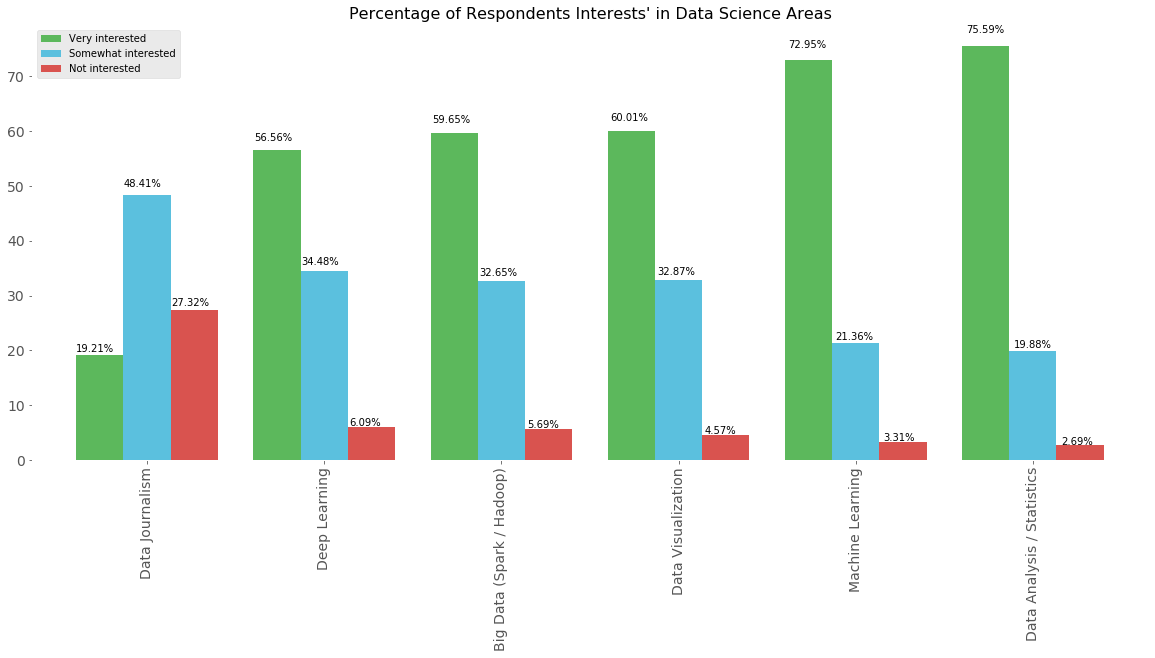

In [11]:
ax = df_sur.plot(kind='bar',
                       figsize = (20, 8),
                       width = 0.8,
                       color = ['#5cb85c', '#5bc0de', '#d9534f'],
                       fontsize = 14)
plt.title('Percentage of Respondents Interests\''' in Data Science Areas', fontsize=16)
ax.set_facecolor((1.0, 1.0, 1.0))
x_axis = ax.axes.get_xaxis()
for p in ax.patches:
    ax.annotate(str(p.get_height()) + '%', (p.get_x() * 1.005, p.get_height() * 1.03))
plt.show()

In [12]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium installed and imported!')

Solving environment: ...working... done

# All requested packages already installed.

Folium installed and imported!


In [14]:
df_sfcrime = pd.read_csv("https://cocl.us/sanfran_crime_dataset")

In [15]:

df_tmp = df_sfcrime.groupby(['PdDistrict']).count().reset_index()
df_tmp.drop(['Category','Descript','DayOfWeek','Date','Time', 'Resolution','Address','X','Y','Location','PdId'], axis=1, inplace=True)
df_tmp.rename(columns={'PdDistrict':'Neighborhood', 'IncidntNum':'Count'}, inplace=True)

In [16]:
df_tmp

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [17]:
#https://cocl.us/sanfran_geojson
!wget --quiet https://cocl.us/sanfran_geojson -O sanfran_geo.json    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc


In [18]:
sf_geo = r'sanfran_geo.json' # geojson file

# create a plain San Francisco map
sf_map = folium.Map(location=[37.773972, -122.431297], zoom_start=12) #, tiles='Mapbox Bright')
sf_map.choropleth(
    geo_data=sf_geo,
    data=df_tmp,
    columns=['Neighborhood','Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Francisco Crimes'
)

# display map
sf_map

JSONDecodeError: Expecting value: line 1 column 1 (char 0)